## Numpy

In [1]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [2]:
import random
import timeit
import time

def timeit(func):
    def wrapper(*args, **kwargs):
        t1 = time.time()
        func(*args, **kwargs)
        t2 = time.time() - t1
        print(f"Function {func.__name__} took: {t2:.5f} seconds")
    return wrapper


@timeit
def tablica(n):
    tab = [random.random() for i in range(n)]
    return [i+1 for i in range(len(tab))]

@timeit
def tablica_numpy(n):
    return np.random.random(n) + 1


print(tablica(10000))
print(tablica_numpy(10000))

Function tablica took: 0.00114 seconds
None
Function tablica_numpy took: 0.00223 seconds
None


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [3]:
from math import sin, cos
import timeit

def tablica(size):
    return [x * 0.1 for x in range(size)]

def tablica_numpy(size):
    return np.arange(size) * 0.1

def suma_sin_cos(tab):
    return [sin(x) + cos(x) for x in tab]

def suma_sin_cos_np(tab):
    return np.sin(tab) + np.cos(tab)

lista = tablica(10000)
tab_np = tablica_numpy(10000)
czas_list = timeit.timeit(lambda: suma_sin_cos(lista), number=10)
czas_np = timeit.timeit(lambda: suma_sin_cos_np(tab_np), number=10)
print(f"Czas wykonania suma_sin_cos (lista): {czas_list:.4f} sekund")
print(f"Czas wykonania suma_sin_cos_np (numpy): {czas_np:.4f} sekund")

Czas wykonania suma_sin_cos (lista): 0.0423 sekund
Czas wykonania suma_sin_cos_np (numpy): 0.0028 sekund


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [4]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

In [5]:
def cube_sum_numpy(x):
    return np.sum(np.power(np.array(x), 3))

def almost_variance_numpy(x):
    return np.sum(np.power(np.array(x) - np.mean(x), 4)) / np.array(x).size

In [6]:
print(almost_variance([1,2,3,4]) == almost_variance_numpy([1,2,3,4]))
print(cube_sum_numpy([1, 2 , 3, 4, -5]) == cube_sum([1, 2, 3, 4, -5]))


True
True


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [7]:
np.arange(1, 11).reshape((10, 1)) * np.arange(1, 11)

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [8]:
def d_e(a1, a2):
    return np.sum(np.power(np.subtract(a1,a2),2))

a1 = np.random.random((10,5))
a2 = np.random.random((10,5))
d_e(a1,a2)

7.055675627764789

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [9]:
def white(arr):
    return (arr.T - np.mean(arr,axis=1))/np.std(arr, axis=1)

X = np.array([[0,2,4,6,8], [1,3,5,7,9]])
white(X)

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [10]:
def closest(arr,x):
    return arr.flatten()[np.argmin(np.abs(x - arr).flatten())]

print(closest(np.array([1,-4,3]), 1.5))
print(closest(np.arange(27).reshape((3,3,3)), 7.54))

1
8


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [11]:
def poly(arr, x):
    l1 = np.cumprod(np.concatenate((np.array([1]), np.tile(np.array([x]), arr.size-1))))
    return np.sum(l1 * arr)

arr = np.array([1,2,3,4,5])
print(poly(arr, 1))
print(poly(arr, 2))
print(poly(arr, -1))

15
129
3


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

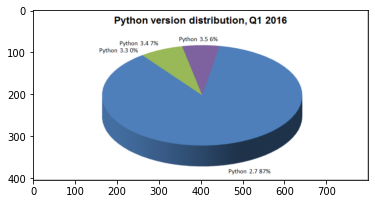

In [22]:
img = mpimg.imread('images/pie.png')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

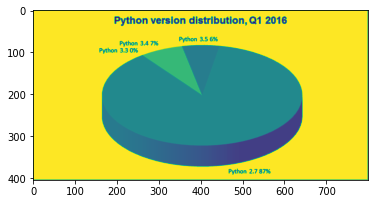

In [23]:
def rgb_to_grayscale(image):
    coefficients = np.array([0.2126, 0.7152, 0.0722])
    gray_image = np.dot(image[..., :3], coefficients)
    gray_image = np.clip(gray_image, 0, 255)
    return plt.imshow(gray_image)

rgb_to_grayscale(img);

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [24]:
def interpolacja(x1, x2):
    lam = np.arange(0,1.1,0.1).reshape((-1,1))
    return (lam * x1) + (1-lam)*x2

interpolacja(np.array([1,2,3,5]),np.array([1,4,6,4]))

array([[1. , 4. , 6. , 4. ],
       [1. , 3.8, 5.7, 4.1],
       [1. , 3.6, 5.4, 4.2],
       [1. , 3.4, 5.1, 4.3],
       [1. , 3.2, 4.8, 4.4],
       [1. , 3. , 4.5, 4.5],
       [1. , 2.8, 4.2, 4.6],
       [1. , 2.6, 3.9, 4.7],
       [1. , 2.4, 3.6, 4.8],
       [1. , 2.2, 3.3, 4.9],
       [1. , 2. , 3. , 5. ]])